# Trabalho

Integrantes do grupo


1. Entender o problema (objetivo) 

2. Entender os dados (usar a estatística para isso)

    - Descrever as colunas
    - Tem dado faltante?
    - Quantas colunas numéricas (quantitativas) e quantas categóricas (qualitativas)? Classifique
    - Calcular média, mediana, desvio padrão, quartis, percentis, assimetria, moda, correlação
    - Identificar os outliers
    - Criar gráficos para fazer a visualização dos dados

3. Limpar os dados (preparar os dados)

4. Escolher uma coluna para analisar a data (datetime)

5. Conclusão sobre os dados

# Entrega dia 22/05

Enviar link do github pelo class ou enviar o notebook pelo class.

Qualquer dúvida: renata.marchese@ada.tech

In [3]:
import pandas as pd

In [4]:
df = pd.read_excel("rfv_analise.xlsx")

In [14]:
df.tail(5)

,Rede,UF,BU,BU New,Canal VD-VI-Hosp,Ano,Trimestre,Mês,Entregue - Liq Abatimento,Qtd Entregue
85797,CIRURGICA MONTEBELLO LTDA,PE,MARCAS,SANOFI PP,HOSPITALAR,2022,4 TRIMESTRE,DEZEMBRO,0.0,0.0
85798,CIRURGICA MONTEBELLO LTDA,PE,MARCAS,TAKEDA CH,HOSPITALAR,2022,4 TRIMESTRE,DEZEMBRO,0.0,0.0
85799,CIRURGICA MONTEBELLO LTDA,PE,MARCAS,TAKEDA PP,HOSPITALAR,2022,4 TRIMESTRE,DEZEMBRO,0.0,0.0
85800,CIRURGICA MONTEBELLO LTDA,PE,SMART,INSTITUCIONAL,HOSPITALAR,2022,4 TRIMESTRE,DEZEMBRO,0.0,0.0
85801,CIRURGICA MONTEBELLO LTDA,PE,SMART,SMART GENERICS,HOSPITALAR,2022,4 TRIMESTRE,DEZEMBRO,0.0,0.0


1. Entender o problema (objetivo): Realizar análise de RFV dos clientes HyperaPharma
2. Entender os dados (usar a estatística para isso)

    - Descrever as colunas 

        * Rede: Cliente
        * UF: Estado
        * BU: Unidade de Negócio
        * BU New: "Subdivisão" da unidade de negócio 
        * Canal VD-VI-Hosp: Canal de distribuição
        * Entregue - Liq Abatimento: Valor faturado entregue ao cliente
        * Qtd Entregue: Unidades (cx)

    - Tem dado faltante? Não


In [16]:
qtd_nulos = df.isnull().sum()
qtd_nulos

Rede                         0
UF                           0
BU                           0
BU New                       0
Canal VD-VI-Hosp             0
Ano                          0
Trimestre                    0
Mês                          0
Entregue - Liq Abatimento    0
Qtd Entregue                 0
dtype: int64

    - Quantas colunas numéricas (quantitativas) e quantas categóricas (qualitativas)? Classifique
      
        * Rede: Qualitativa nominal
        * UF: Qualitativa nominal
        * BU: Qualitativa nominal
        * BU New: Qualitativa nominal 
        * Canal VD-VI-Hosp: Qualitativa nominal
        * Ano: Qualitativa ordinal
        * Trimestre: Qualitativa ordinal
        * Mês: Qualitativa ordinal
        * Entregue - Liq Abatimento: Quantitativa discreta
        * Qtd Entregue: Quantitativa discreta


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85802 entries, 0 to 85801
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rede                       85802 non-null  object 
 1   UF                         85802 non-null  object 
 2   BU                         85802 non-null  object 
 3   BU New                     85802 non-null  object 
 4   Canal VD-VI-Hosp           85802 non-null  object 
 5   Ano                        85802 non-null  int64  
 6   Trimestre                  85802 non-null  object 
 7   Mês                        85802 non-null  object 
 8   Entregue - Liq Abatimento  85802 non-null  float64
 9   Qtd Entregue               85802 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 6.5+ MB


In [36]:
df_filter = df.filter(["Entregue - Liq Abatimento", "Qtd Entregue"])
df_filter

,Entregue - Liq Abatimento,Qtd Entregue
0,0.00,0.0
1,0.00,0.0
2,0.00,0.0
3,5386.33,64.0
4,25947.19,352.0
...,...,...
85797,0.00,0.0
85798,0.00,0.0
85799,0.00,0.0
85800,0.00,0.0


- Calcular média, mediana, desvio padrão, quartis, percentis, assimetria, moda, correlação


In [38]:
df_filter.mean()

Entregue - Liq Abatimento    314618.163917
Qtd Entregue                  29613.500863
dtype: float64

In [39]:
df_filter.median()

Entregue - Liq Abatimento    45363.645
Qtd Entregue                  2227.500
dtype: float64

In [40]:
df_filter.std()

Entregue - Liq Abatimento    904233.471659
Qtd Entregue                 106013.858062
dtype: float64

In [54]:
quartis = df_filter.quantile([0.25, 0.5, 0.75])  #0.5 = mediana
quartis

,Entregue - Liq Abatimento,Qtd Entregue
0.25,3131.5000,120.0
0.50,45363.6450,2227.5
0.75,256818.3675,17970.0


In [62]:
#intervalo interquartil
IQR_df = df_filter.quantile([0.25, 0.75])

IQR = IQR_df.diff().iloc[1]
IQR

Entregue - Liq Abatimento    253686.8675
Qtd Entregue                  17850.0000
Name: 0.75, dtype: float64

In [64]:
#Assimetria   - Assimetria - distribuição com cauda à direita

ass = df_filter.skew()   
ass

Entregue - Liq Abatimento    10.726830
Qtd Entregue                 12.760895
dtype: float64

In [69]:
# Moda

moda = df_filter.mode().iloc[0]
moda


Entregue - Liq Abatimento    0.0
Qtd Entregue                 0.0
Name: 0, dtype: float64

    correlação
    - Identificar os outliers
    - Criar gráficos para fazer a visualização dos dados

C:\Users\diullio.santos\AppData\Local\Temp\ipykernel_4664\3927726266.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plot = sn.distplot((df["Entregue - Liq Abatimento"]/max(df["Entregue - Liq Abatimento"])),color='purple')


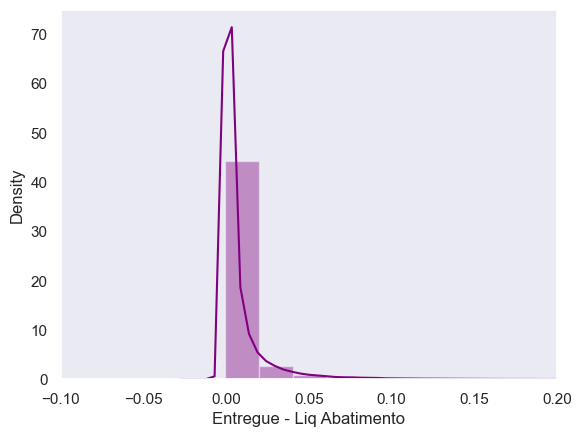

In [10]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

sn.set(style='dark',)
plot = sn.distplot((df["Entregue - Liq Abatimento"]/max(df["Entregue - Liq Abatimento"])),color='purple')
plt.xlim([-0.1, 0.2])

plt.show()